In [9]:
## Program Written by Nicholas Munoz
import numpy as np
def Dice():
    ## Rolls two die independent of each other
    
    
    Dice1 = np.random.randint(1, 7, 1)
    Dice2 = np.random.randint(1, 7, 1)
    
    return Dice1, Dice2


In [11]:
Dice1,Dice2 = Dice()
print (Dice1,Dice2)

[5] [5]


In [19]:
NRolls = int(1e6) ## Total number of rolls
Pairs = 0
Roll = np.zeros((NRolls,2),dtype=int) ## This is the number of rolls and our pair of each roll
for i in range(NRolls):
    count = 0 
    Dice1,Dice2 = Dice()
    
    Roll[i,0],Roll[i,1] = Dice1, Dice2
    ## Now we will take the number of pairs by summing their total values like 2+2 = a pair of 2's 
    if (Dice1+Dice2 == 12):
        Pairs+=1
print ("Total number of rolls",NRolls)
print ("Number of Pairs",Pairs)
print ("Probablity of a pair", Pairs/NRolls)
    

Total number of rolls 1000000
Number of Pairs 27763
Probablity of a pair 0.027763


[-5, 0, -1, -5, 1]


<function matplotlib.pyplot.show(*args, **kw)>

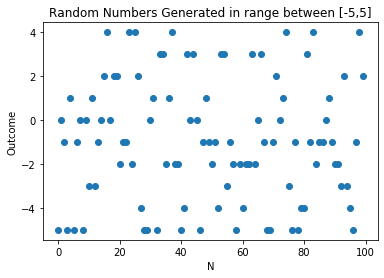

In [70]:
## Generating random numbers between [-,5,5]
## x' = (ax+c)%m
N = 100
Generate = []
a = 7**7
c = 2000
m = 2**31-1
x = 1
for i in range(N):
    x = (a*x+c)%m
    Generate.append(x)
Generate = [int(x/m*10)-5  for x in Generate]
print(Generate[:5])
plt.plot(Generate,"o")
plt.title("Random Numbers Generated in range between [-5,5]")
plt.xlabel("N")
plt.ylabel("Outcome")
plt.show



    
    



MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.HTMLWriter'> instead.


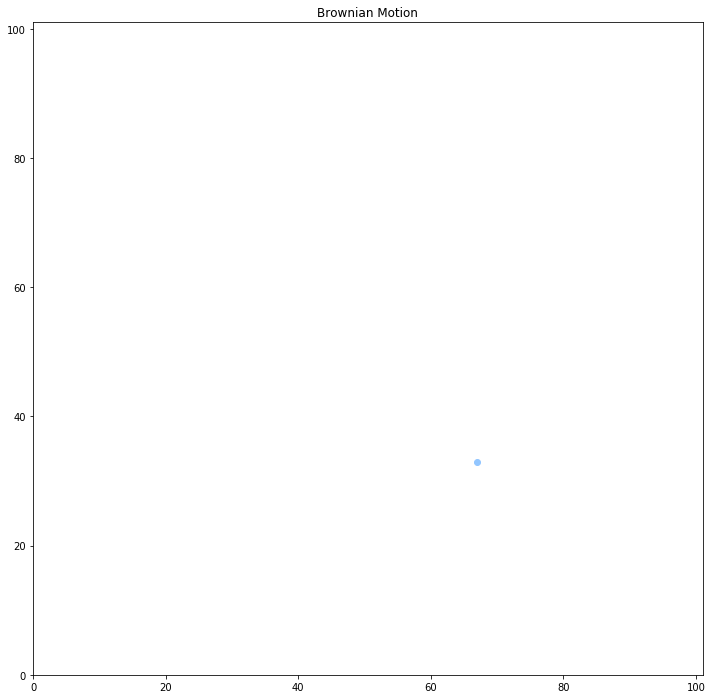

In [86]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.style.use('seaborn-pastel')

# Brownian Motion
L1 = 101
L2 = 101
N = 450

fig = plt.figure(figsize=[12, 12])
ax = plt.axes(xlim=(0,L1), ylim=(0,L2))
plt.title('Brownian Motion Animation')
coordinate, = ax.plot([], [], "o")
x = int(L1/2)
y = int(L2/2)
global position = [x, y]
position1 = [0,0]
direction = np.array([ [0, 1], [0, -1], [1, 0], [-1, 0] ])


def init():
    coordinate.set_data([], [])
    return coordinate,


def animate(i):
    position1 = [-1,-1]
    while min(position1) < 0 or position1[0] > L1 or position1[1] > L2:
        move = np.random.randint(len(direction))
        position1 = position + direction[move]
    position = position1
    

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=20, blit=True)


anim.save('Brownian.html')


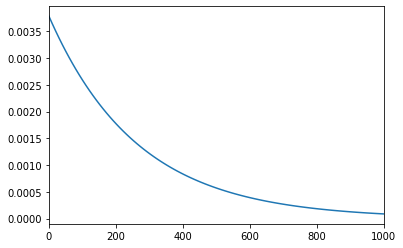

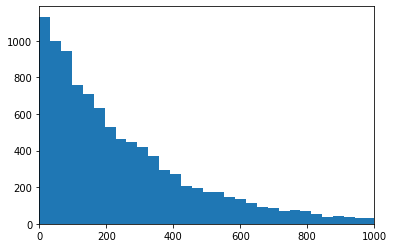

In [71]:
# first generate and show the probability distribution P(x)
tau = 3.053*60 # half-life of Thallium-208
mu = np.log(2)/tau
x = np.linspace(0, 1000, 100)
P = mu*np.exp(-mu*x)

plt.plot(x, P)
plt.xlim(0, 1000)
plt.show()

#create random number generator following distribution
N = 10000
xvalues = []
for i in range(N):    
    z = np.random.random()
    xvalues.append(-np.log(1-z)/mu)

plt.hist(xvalues, 100)
plt.xlim(0, 1000)
plt.show()

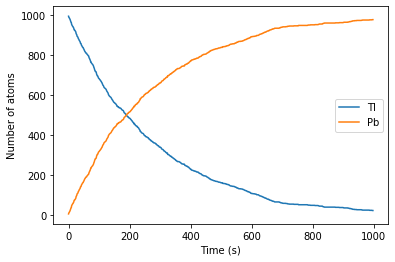

In [2]:
# To generate the exponential distribution from uniform distribution
import numpy as np
import matplotlib.pyplot as plt

tau = 3.053*60

N_atom = 1000   #1000 Tl atoms
N_time = 1000   #1000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])  #the array to store the number of decayed atoms in each time step 
N_Tl = N_atom * np.ones([N_time-1])  #the array to store the number of decayed atoms in each time step 

for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    if x0<N_time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()